In [134]:
import pandas as pd
import numpy as np
import seaborn as sns

In [135]:
df1=pd.read_csv('/content/Unemployment in India.csv')
df2=pd.read_csv('/content/Unemployment_Rate_upto_11_2020.csv')

In [136]:
df1.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [137]:
df2.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [138]:
#finding missing values in df1
df1.isnull().sum()

,0
Region,28
Date,28
Frequency,28
Estimated Unemployment Rate (%),28
Estimated Employed,28
Estimated Labour Participation Rate (%),28
Area,28


In [139]:
#finding missing values in df2
df2.isnull().sum()

,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Region.1,0
longitude,0
latitude,0


In [140]:
#drop missing values
df1.dropna(inplace=True)

In [141]:
df1.isnull().sum()

,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Area,0


In [142]:
df1.columns=df1.columns.str.strip().str.lower().str.replace(' ', '_')
df2.columns=df2.columns.str.strip().str.lower().str.replace(' ', '_')

In [143]:
#convert date column to datetime format
df1['date'] = df1['date'].astype(str).str.strip() # Access the column using its new name: 'date'

In [144]:
df2['date']=df2['date'].str.strip()

In [145]:
df1['date']=pd.to_datetime(df1['date'], format='%d-%m-%Y')
df2['date']=pd.to_datetime(df2['date'], format='%d-%m-%Y')

In [146]:
#Top 5 regions with highest unemployment rates
covid_period_start='2020-03-01'
covid_period_end='2020-12-31'
covid_data1=df1[(df1['date']>=covid_period_start)&(df1['date']<=covid_period_end)]
covid_data2=df2[(df2['date']>=covid_period_start)&(df2['date']<=covid_period_end)]
top_regions1=covid_data1.groupby('region')['estimated_unemployment_rate_(%)'].mean().sort_values(ascending=False).head(5)
top_regions2=covid_data2.groupby('region')['estimated_unemployment_rate_(%)'].mean().sort_values(ascending=False).head(5)

print("Top 5 Regions with Highest Unemployment Rates (Df 1):")
print(top_regions1)
print("\nTop 5 Regions with Highest Unemployment Rates (Df 2):")
print(top_regions2)

Top 5 Regions with Highest Unemployment Rates (Df 1):
region
Puducherry    38.95500
Jharkhand     36.34875
Haryana       34.65250
Bihar         31.63125
Tripura       26.70250
Name: estimated_unemployment_rate_(%), dtype: float64

Top 5 Regions with Highest Unemployment Rates (Df 2):
region
Haryana       28.58250
Tripura       23.68500
Puducherry    22.13500
Bihar         21.72625
Jharkhand     21.61625
Name: estimated_unemployment_rate_(%), dtype: float64


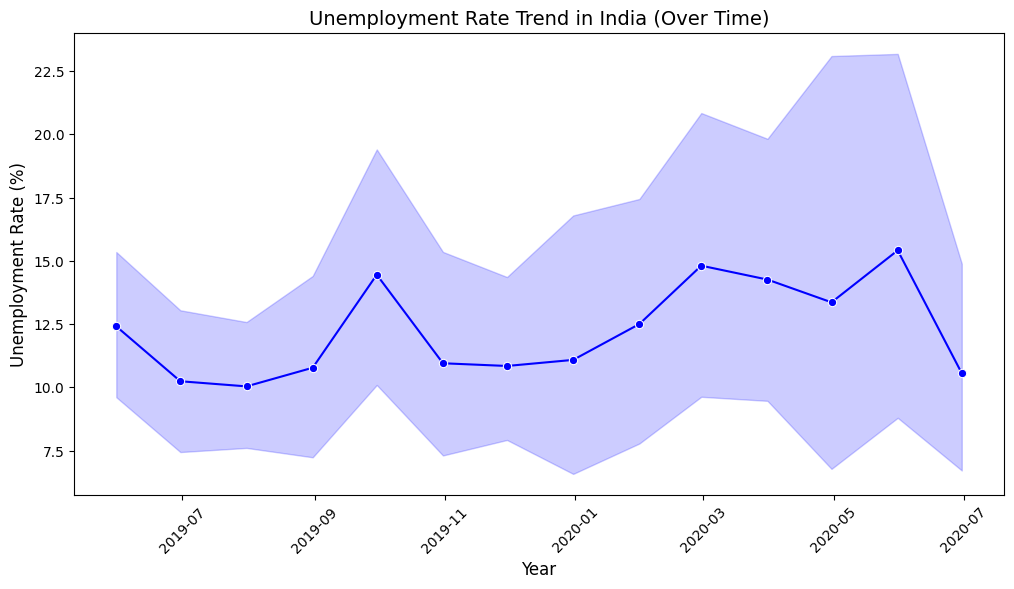

In [147]:
#Unemployment rate over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=df1["date"], y=df2["estimated_unemployment_rate_(%)"], marker='o', color='b')
plt.title("Unemployment Rate Trend in India (Over Time)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Unemployment Rate (%)", fontsize=12)
plt.xticks(rotation=45)
plt.show()

<ipython-input-148-114769d03380>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=latest_data["region"], x=latest_data["estimated_unemployment_rate_(%)"], palette="viridis")


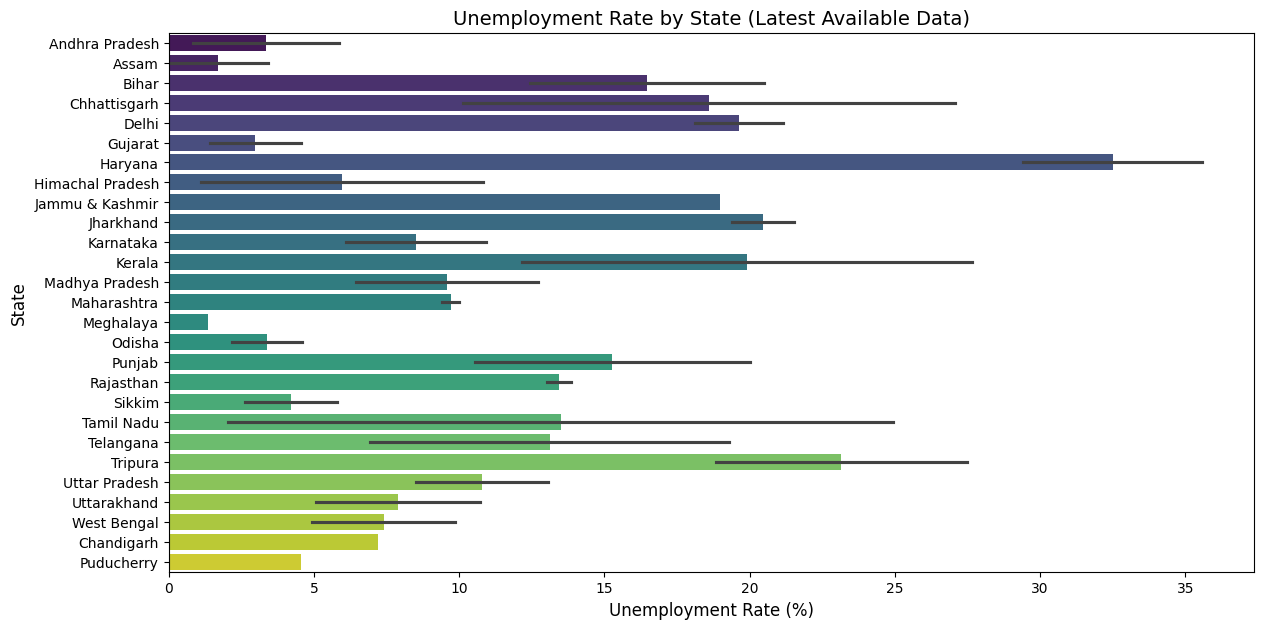

In [148]:
# Unemployment rate by state
latest_data = df1[df1["date"] == df1["date"].max()]

# Note: Using 'region' instead of 'Region' to match the DataFrame column name
plt.figure(figsize=(14, 7))
sns.barplot(y=latest_data["region"], x=latest_data["estimated_unemployment_rate_(%)"], palette="viridis")
plt.title("Unemployment Rate by State (Latest Available Data)", fontsize=14)
plt.xlabel("Unemployment Rate (%)", fontsize=12)
plt.ylabel("State", fontsize=12)
plt.show()

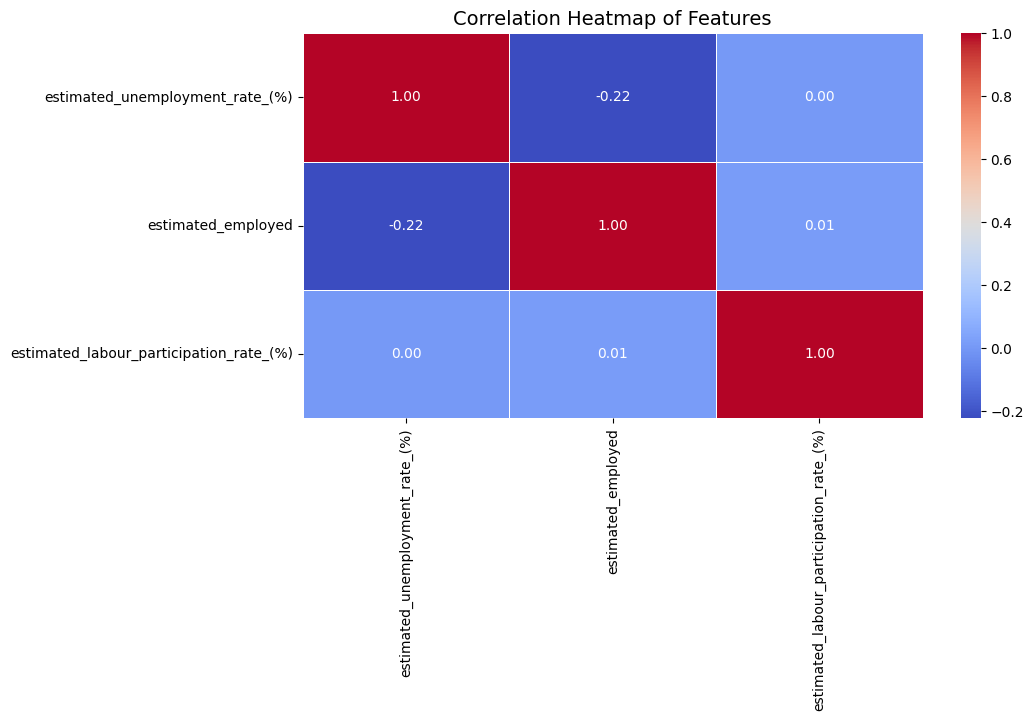

In [149]:
# Heatmap: Correlation between numerical variables
plt.figure(figsize=(10, 5))
# Select only numerical columns for correlation calculation
numerical_df = df1.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Features", fontsize=14)
plt.show()

In [150]:
#Accuracy using Random Forest Regressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Prepare the data for modeling
# Assuming 'estimated_unemployment_rate_(%)' is the target variable
# Select features and target
X = df1[['date', 'region', 'estimated_employed', 'estimated_labour_participation_rate_(%)']]
y = df1['estimated_unemployment_rate_(%)']

# 2. Preprocessing
# Convert 'date' to numerical features (e.g., year, month, day)
df1['year'] = df1['date'].dt.year
df1['month'] = df1['date'].dt.month
df1['day'] = df1['date'].dt.day
X = df1[['year', 'month', 'day', 'region', 'estimated_employed', 'estimated_labour_participation_rate_(%)']]

# One-hot encode categorical features ('region')
categorical_features = ['region']
numerical_features = ['year', 'month', 'day', 'estimated_employed', 'estimated_labour_participation_rate_(%)']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)])

# 3. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Create and train the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(random_state=4))])
model.fit(X_train, y_train)

# 5. Make predictions on the test set
y_pred = model.predict(X_test)

# 6. Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RandomForestRegressor - Mean Absolute Error (MAE): {mae}")
print(f"RandomForestRegressor - Mean Squared Error (MSE): {mse}")
print(f"RandomForestRegressor - R-squared (R2): {r2}")

RandomForestRegressor - Mean Absolute Error (MAE): 3.6748743243243234
RandomForestRegressor - Mean Squared Error (MSE): 42.898979950675646
RandomForestRegressor - R-squared (R2): 0.7036907099679826


In [151]:
#Accuracy using XG Boost
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder  # Import OneHotEncoder
import pandas as pd  # Import pandas for DataFrame manipulation

# Assuming X and y are your features and target variable
# ... (Your existing data loading and preprocessing code) ...

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encode 'region' column in X_train and X_test
# Create a OneHotEncoder instance
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit the encoder on the 'region' column of the training data
encoder.fit(X_train[['region']])

# Transform the 'region' column in both training and testing data
X_train_encoded = encoder.transform(X_train[['region']])
X_test_encoded = encoder.transform(X_test[['region']])

# Get feature names after one-hot encoding
encoded_feature_names = encoder.get_feature_names_out(['region'])

# Create DataFrames from the encoded data
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_feature_names, index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_feature_names, index=X_test.index)

# Drop the original 'region' column and concatenate encoded features
X_train = X_train.drop('region', axis=1).join(X_train_encoded_df)
X_test = X_test.drop('region', axis=1).join(X_test_encoded_df)

# Create and train the XGBoost model with enable_categorical=True
xgb_model = xgb.XGBRegressor(random_state=4, enable_categorical=True)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - Mean Absolute Error (MAE): {mae_xgb}")
print(f"XGBoost - Mean Squared Error (MSE): {mse_xgb}")
print(f"XGBoost - R-squared (R2): {r2_xgb}")

XGBoost - Mean Absolute Error (MAE): 3.5236065620586685
XGBoost - Mean Squared Error (MSE): 34.98580380644298
XGBoost - R-squared (R2): 0.7583481309111337


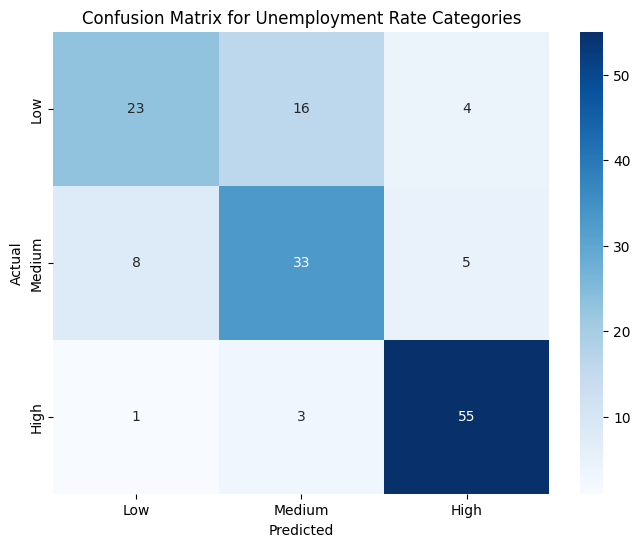

In [152]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# ... (Your existing code for model training and prediction) ...

# 1. Define unemployment rate categories
def categorize_unemployment(rate):
    if rate < 5:
        return 'Low'
    elif rate < 10:
        return 'Medium'
    else:
        return 'High'

# 2. Apply categorization to actual and predicted values
y_test_cat = [categorize_unemployment(rate) for rate in y_test]
y_pred_cat = [categorize_unemployment(rate) for rate in y_pred_xgb]  # Using XGBoost predictions

# 3. Create the confusion matrix
cm = confusion_matrix(y_test_cat, y_pred_cat, labels=['Low', 'Medium', 'High'])

# 4. Display the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Unemployment Rate Categories')
plt.show()

<ipython-input-153-922360eb574f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_unemployment.index, y=region_unemployment.values, palette="viridis")


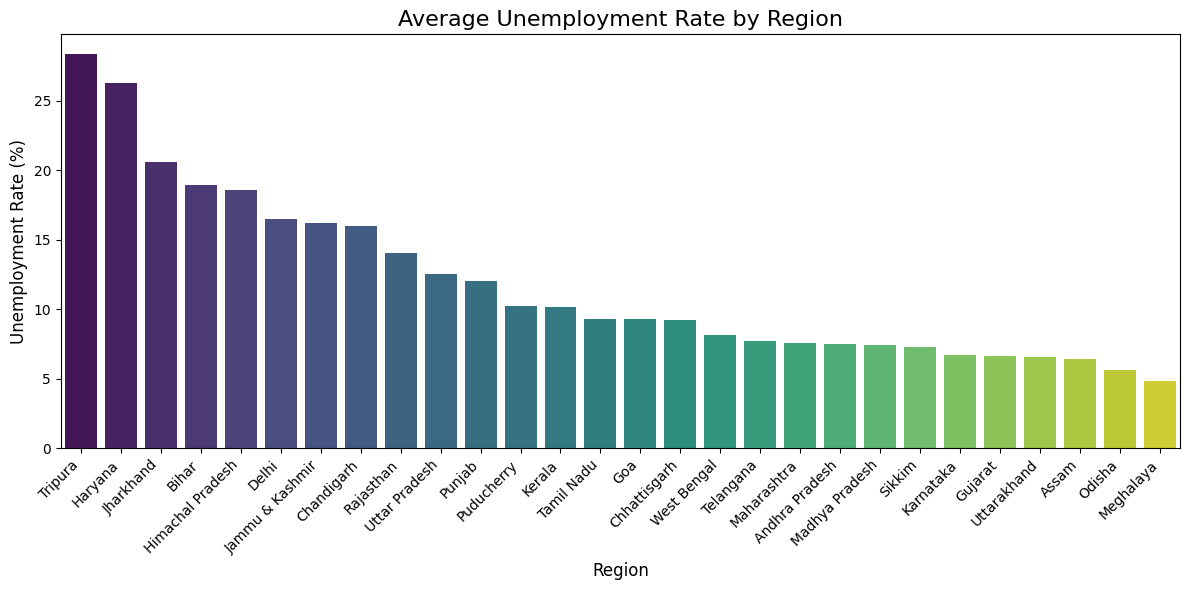

In [153]:
# 1.Comparing average Unemployment Rate in different regions
region_unemployment = df1.groupby('region')['estimated_unemployment_rate_(%)'].mean().sort_values(ascending=False)

# 2. Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=region_unemployment.index, y=region_unemployment.values, palette="viridis")
plt.title('Average Unemployment Rate by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Unemployment Rate (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()